데이터 시각화의 두 가지 목적:
1. 데이터 탐색
2. 데이터 전달

## 3.1 matplotlib
- 웹을 위한 복잡하고 인터랙티브한 시각화를 만들고 싶다면 가장 좋은 선택이 아니다
- 간단한 막대 그래프, 선 그래프, 또는 산점도를 그릴 때는 나쁘지 않다

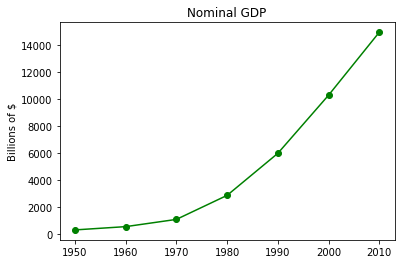

In [3]:
from matplotlib import pyplot as plt

years= [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.3,1079.9,2862.5,5979.6,10289.7,14958.3]

#x축에 연도, y축에 GDP가 있는 선 그래프
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')

#제목
plt.title("Nominal GDP")

#y축에 레이블 추가
plt.ylabel("Billions of $")
plt.show()

## 3.2 막대 그래프(bar graph)
: 이산적인(discrete) 항목들에 대한 변화를 보여 줄 때 사용하면 좋다

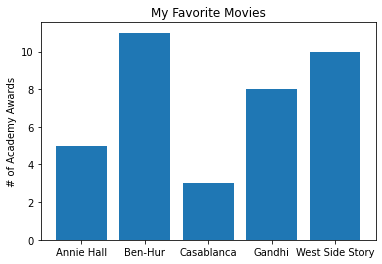

In [6]:
movies = ["Annie Hall","Ben-Hur","Casablanca","Gandhi","West Side Story"]
num_oscars = [5,11,3,8,10]

#막대의 x 좌표는 [0,1,2,3,4], y 좌표는 [num_oscars]로 설정
plt.bar(range(len(movies)),num_oscars)

plt.title("My Favorite Movies")#제목을 추가
plt.ylabel("# of Academy Awards")#y축에 레이블을 추가

#x축 각 막대의 중앙에 영화제목을 레이블로 추가
plt.xticks(range(len(movies)),movies)
plt.show()

<b>막대 그래프를 이용한 히스토그램(histogram) 그리기</b>
<br>
히스토그램: 정해진 구간에 해당되는 항목의 개수를 보여줌으로써 값의 분포를 관찰할 수 있는 그래프 형태

In [8]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]

#점수는 10점 단위로 그룹화한다. 100점은 90점대에 속한다.
histogram = Counter(min(grade//10*10,90)for grade in grades)
histogram#그룹화

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})

In [10]:
histogram.keys()

dict_keys([80, 90, 70, 0, 60])

- plt.bar의 세 번째 인자는 막대의 너비를 정함
- 각 구간의 너비가 10이므로 막대의 너비 또한 10으로 설정
- 막대들을 오른쪽으로 5씩 이동해서 10에 해당하는 막대의 중점이 15가 되게끔 함
- plt.axis는 x축의 범위를 -5에서 105로 함으로써 0과 100에 해당하는 막대가 잘리지 않도록 그림

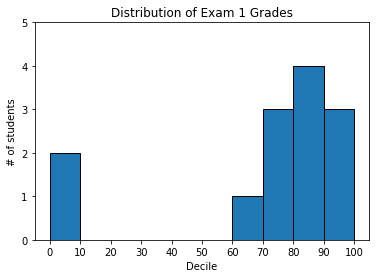

In [17]:
plt.bar([x+5 for x in histogram.keys()],#각 막대를 오른쪽으로 5만큼 옮김
        histogram.values(),#각 막대의 높이를 정해줌
        10,#너비는 10
        edgecolor = (0,0,0)#각 막대의 테두리를 검은색으로 설정
       )
plt.axis([-5,105,0,5])#x축은 -5부터 105, y축은 0부터 5
plt.xticks([10*i for i in range(11)])#x축의 레이블은 0,10,...,100
plt.xlabel("Decile")#10분위 수
plt.ylabel("# of students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

plt.axis를 사용할 때는 신중해야 한다.<br>
막대 그래프를 그릴 때 y축을 0에서 시작하지 않으면 다음과 같이 오해를 불러 일으키기 쉽다

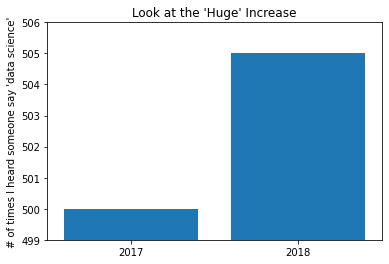

In [26]:
mentions = [500,505]
years = [2017,2018]

plt.bar(years, mentions,0.8)#0.8은 너비
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

#이렇게 하지 않으면 matplotlib이 x축에 0,1 레이블을 달고
#주변부 어딘가에 +2.013e3라고 표기해둘 것이다.
plt.ticklabel_format(useOffset=False)

#오해를 불러일으키는 y축은 500 이상의 부분만 보여 줄 것이다
plt.axis([2016.5, 2018.5, 499,506])
plt.title("Look at the 'Huge' Increase")
plt.show()

더 적합한 축 사용을 통해 개선된 그래프:
- Before: plt.axis([2016.5, 2018.5, 499,506])
- After: plt.axis([2016.5, 2018.5, 0,550])

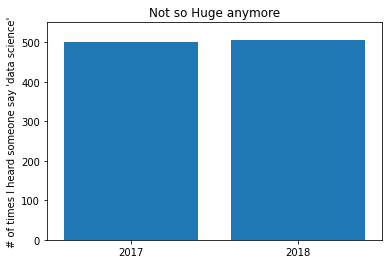

In [28]:
mentions = [500,505]
years = [2017,2018]

plt.bar(years, mentions,0.8)#0.8은 너비
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

#이렇게 하지 않으면 matplotlib이 x축에 0,1 레이블을 달고
#주변부 어딘가에 +2.013e3라고 표기해둘 것이다.
plt.ticklabel_format(useOffset=False)

#오해를 불러일으키는 y축은 500 이상의 부분만 보여 줄 것이다
plt.axis([2016.5, 2018.5, 0,550])#바뀐 부분
plt.title("Not so Huge anymore")
plt.show()

## 3.3 선 그래프
plt.plot()을 이용하면 선 그래프(line chart)를 그릴 수 있다.<br>
이 그래프는 다음과 같이 어떤 경향을 보여줄 때 유용하다.

In [30]:
variance = [2**i for i in range(9)]
variance

[1, 2, 4, 8, 16, 32, 64, 128, 256]

In [36]:
bias_squared = sorted(variance, reverse=True)
print(bias_squared)

[256, 128, 64, 32, 16, 8, 4, 2, 1]


In [38]:
total_error = [x+y for x,y in zip(variance, bias_squared)]
xs =[i for i,_ in enumerate(variance)]

여러 개의 선 그래프와 범례 동시에 그리기

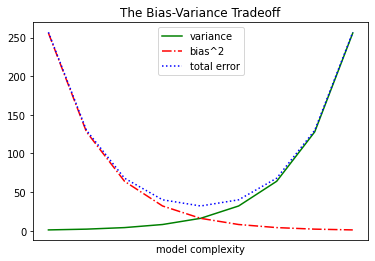

In [42]:
#한 차트에 여러개의 선을 그리기 위해 plt.plot을 여러 번 호출 가능
plt.plot(xs, variance, 'g-',label = 'variance')#실선
plt.plot(xs, bias_squared,'r-.',label='bias^2')#일점쇄선
plt.plot(xs, total_error, 'b:',label= 'total error')#점선

#각 선에 레이블을 미리 달아놨기 때문에
#범례를 쉽게 그릴 수 있다
plt.legend(loc=0)#loc: legend 위치인듯
plt.xlabel("model complexity")
plt.xticks([])#[]:눈금이 없다는 뜻
plt.title("The Bias-Variance Tradeoff")
plt.show()

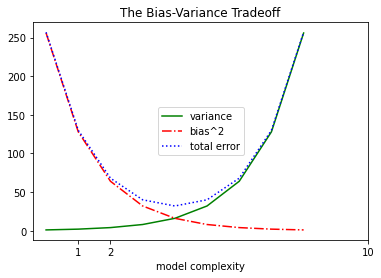

In [51]:
#한 차트에 여러개의 선을 그리기 위해 plt.plot을 여러 번 호출 가능
plt.plot(xs, variance, 'g-',label = 'variance')#실선
plt.plot(xs, bias_squared,'r-.',label='bias^2')#일점쇄선
plt.plot(xs, total_error, 'b:',label= 'total error')#점선

#각 선에 레이블을 미리 달아놨기 때문에
#범례를 쉽게 그릴 수 있다
plt.legend(loc=10)#loc이 뭐지
plt.xlabel("model complexity")
plt.xticks([1,2,10])#눈금 표시
plt.title("The Bias-Variance Tradeoff")
plt.show()

## 산점도
두 변수 간의 연관 관계를 보여 주고 싶을 때 적합한 그래프

예) 각 사용자의 친구 수와 그들이 매일 사이트에서 체류하는 시간 사이의 연관성을 보여줌

In [81]:
import string
friends = [70,65,72,63,71,64,60,64,67]
minutes = [175,170,205,120,220,130,105,145,190]
labels = [list(string.ascii_lowercase)]
labels = [x[0:9]for x in labels]
for x in labels:
    labels = x
labels

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

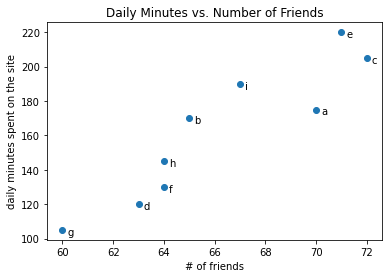

In [82]:
plt.scatter(friends, minutes)

#각 포인트에 레이블을 달자
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, 
                 xy=(friend_count,minute_count),#레이블을 데이터 포인트 근처에 두되
                xytext=(5,-5),#알파벳과 점 사이의 간격
                textcoords = 'offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

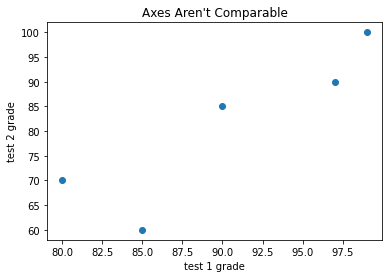

In [88]:
test_1_grades = [99,90,85,97,80]
test_2_grades = [100,85,60,90,70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

위에서 plt.axis("equal")이라는 명령을 추가하면 아래와 같이 공정한 비교를 할 수 있게 된다.

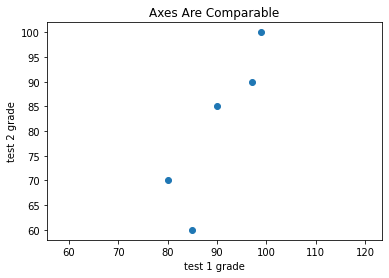

In [87]:
test_1_grades = [99,90,85,97,80]
test_2_grades = [100,85,60,90,70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

이 그림을 보면 test2에서 대부분의 편차가 발생했다는 사실을 알 수 있다.

## For more info)
- matplotlib 갤러리
- seaborn: 더 아름답고 복잡한 시각화 
- Altair: 선언형 시각화(declarative visualization) 파이썬 라이브러리
- D3.js: 웹을 위한 인터랙티브 시각화를 만드는데 사용되는 자바스크립트 라이브러리. 인기 있고 폭넓게 사용됨
- Bokeh: D3.js스타일의 시각화를 파이썬에서 만들 수 있게 해주는 라이브러리